## Question 2 [Leave-One-Out Cross-Validation, 15 Marks]

### Load Libraries

In [236]:
# libraries
library(reshape2)
library(ggplot2)

In [237]:
# import data
train_1a  <-  read.csv("./Task1A_train.csv")
test_1a  <- read.csv("./Task1A_test.csv")

Knn function from question 1

In [238]:
# KNN function (distance = manhattan)
knn <- function(train.data, train.label, test.data, K=K, distance = 'manhattan'){
    ## count number of train samples
    train.len <- nrow(train.data)
    
    ## count number of test samples
    test.len <- nrow(test.data)

    ## calculate distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len),
                                                                           drop = FALSE]
    
    ## for each test sample...
    for (i in 1:test.len){
        ### ...find its K nearest neighbours from training sampels...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]

        ###... and calculate the predicted values according to average.
        test.label[i]<- sum(train.label[nn])/K
    }
    
    ## return the predictions as output
    return (test.label)
}


### 1. Implement a Leave-One-Out cross-validation (CV) function for your KNN regressor: cv(train.data, train.label, K)

In [239]:
# LOOCV function

cv <- function(train.data,train.label, K){
    # define cv folds
    folds  <- nrow(train.data)
    # initialize error
    SE <- 0
    # run cv for each data point in train data
    for (i in 1:folds){
        # define variables
        train_x <- train.data[-i,,drop = FALSE]
        train_y <- train.label[-i,]
        test_x <- train.data[i,,drop = FALSE]
        test_y <- train.label[i,]
        # perform knn
        knn_predict <- knn(train_x,train_y,test_x, K=K)
        # calculate and add up error
        SE <- SE + (knn_predict-test_y)^2  
    }   
    
    # calculate average RMSE
    RMSE <- sqrt(SE/folds)
    return (RMSE)
}

### 2. Run LOOCV for k = 1:20 and plot error vs 1/k

In [240]:
# extract x and y values of train data as single column
train_1a_x  <-  train_1a[,1,drop = FALSE]
train_1a_y  <- train_1a[,2,drop = FALSE]
test.label  <- data.frame("y" = 0)


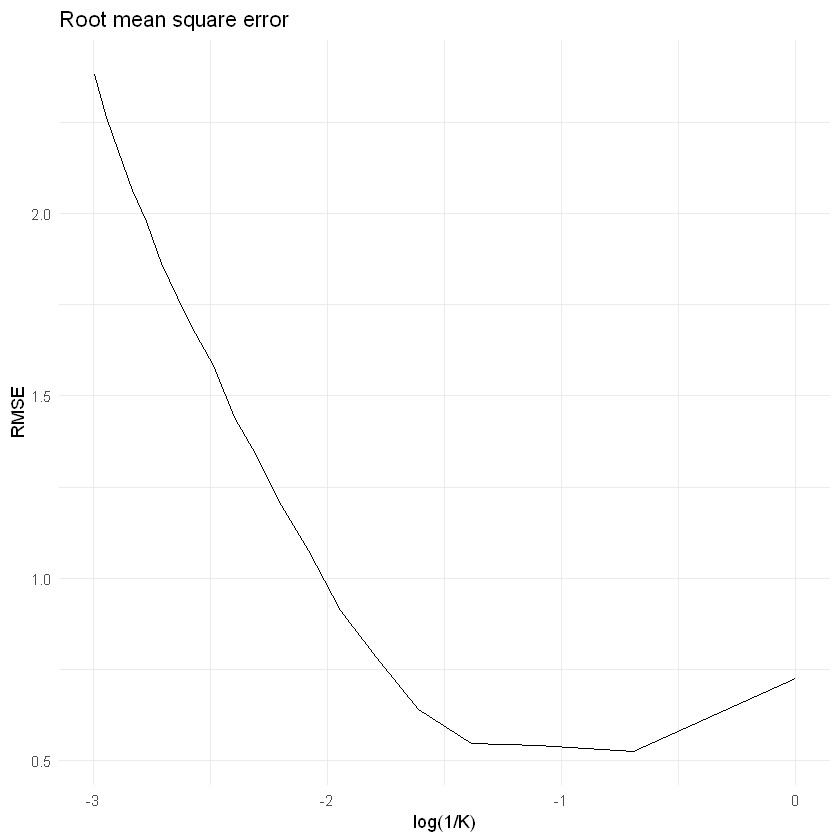

In [241]:
# create a table to store RMSE for k = 1:20
RMSE_cv  <- data.frame('K'=1:20, 'RMSE'=rep(0,20))

# calcualte rmse for k = 1:20
for (k in 1:20){
    RMSE_cv[k,"RMSE"] <- cv(train_1a_x,train_1a_y,k)
}

# plot the errors vs log(1/k) values
ggplot(data=RMSE_cv, aes(x=log(1/K), y=RMSE)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Root mean square error")

In [242]:
# inspect errors for k 1:20
RMSE_cv

K,RMSE
<int>,<dbl>
1,0.7255507
2,0.5249297
3,0.5404735
4,0.5465207
5,0.6404805
6,0.7813698
7,0.9125545
8,1.0771425
9,1.1988283


### 3. Report the optimum value for K 

The plot shows, root mean square errors decrease as k decreases, the lower the k value, the smaller the error. There is one exception around log(1/k) = -0.75, where RMSE increase significantly. Also, RMSE increase significantly when log(1/k) > -1.5. Thus, any point between -1.5 and -0.75 is acceptable. In this case, the optimal k value that produce the smallest RMSE shown on the plot is at k = 2.